Importing neccessary Libraries 


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,f1_score, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Load the dataset

In [2]:
data = pd.read_csv("loan_data.csv")

Analyze the dataset

In [3]:
print('\nNumber of rows and columns: ',data.shape)
print('\nCount null values in each columns: ')
print(data.isnull().sum())
print('\nTotal number of null values :',data.isnull().sum().sum())
print('\nNumber of duplicate rows :',data.duplicated().sum())
print('\nNumber of duplicate columns: ',data.columns.duplicated().sum())
print('\nDiscription of dataset: ')
print(data.describe())


Number of rows and columns:  (32581, 12)

Count null values in each columns: 
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Total number of null values : 4011

Number of duplicate rows : 165

Number of duplicate columns:  0

Discription of dataset: 
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%   

Dealing with null values using the median on each column

In [4]:
columns_to_impute = ["loan_int_rate", "person_emp_length"]
data[columns_to_impute] = data[columns_to_impute].fillna(data[columns_to_impute].median())


Dataset after dealing with null values

In [5]:
print('\nNumber of rows and columns: ',data.shape)
print('\nCount null values in each columns: ')
print(data.isnull().sum())
print('\nTotal number of null values :',data.isnull().sum().sum())
print('\nNumber of duplicate rows :',data.duplicated().sum())
print('\nNumber of duplicate columns: ',data.columns.duplicated().sum())
print('\nDiscription of dataset: ')
print(data.describe())


Number of rows and columns:  (32581, 12)

Count null values in each columns: 
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Total number of null values : 0

Number of duplicate rows : 165

Number of duplicate columns:  0

Discription of dataset: 
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       32581.000000  32581.000000   
mean      27.734600   6.607485e+04           4.767994   9589.371106   
std        6.348078   6.198312e+04           4.087372   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           

Display the first few rows of the dataset

In [6]:
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Plotting the count of given and ungiven loans


Text(0.5, 1.0, 'Number of Given and Ungiven Loans')

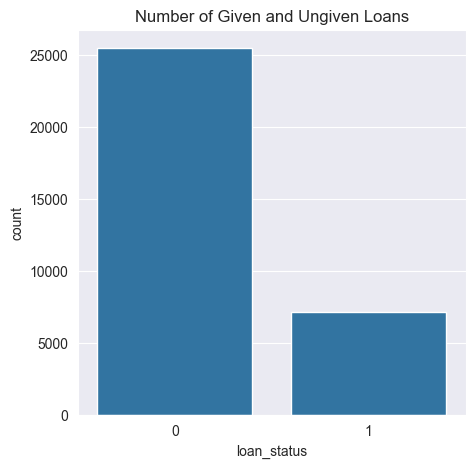

In [7]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.countplot(x='loan_status',data=data)
plt.title('Number of Given and Ungiven Loans')

Feature selection function

In [8]:
def featureSelect_dataframe(x,y,criteria,k):
    reg = SelectKBest(criteria , k=k).fit(x,y)
    x_transformed = reg.transform(x)
    x = x[[val for i,val in enumerate(x.columns) if reg.get_support()[i]]]
    return x

Dataset Partition 

In [9]:
x = data.drop("loan_status", axis=1)
y = data["loan_status"]

Convert object/categorical variables to numerical using LabelEncoder

In [10]:
label_encoders = {}
for col in x.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    x[col] = label_encoders[col].fit_transform(x[col])

Encoded dataset

In [11]:
print("Encoded dataset :")
x.head()

Encoded dataset :


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,0.55,1,4


Applying the feature selection function

In [12]:
new_x=featureSelect_dataframe(x,y,chi2,9)
new_x

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file
0,59000,3,123.0,4,3,35000,16.02,0.59,1
1,9600,2,5.0,1,1,1000,11.14,0.10,0
2,9600,0,1.0,3,2,5500,12.87,0.57,0
3,65500,3,4.0,3,2,35000,15.23,0.53,0
4,54400,3,8.0,3,2,35000,14.27,0.55,1
...,...,...,...,...,...,...,...,...,...
32576,53000,0,1.0,4,2,5800,13.16,0.11,0
32577,120000,0,4.0,4,0,17625,7.49,0.15,0
32578,76000,3,3.0,2,1,35000,10.99,0.46,0
32579,150000,0,5.0,4,1,15000,11.48,0.10,0


Split the dataset into training and testing sets

In [13]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.3, random_state=42)

Scaling the dataset

In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Performance measuring and confusionf matrix function for training set


In [15]:
def perform_Train(y_pred):
    print("\nPrecision : ", precision_score(y_train, y_pred))
    print("\nRecall : ", recall_score(y_train, y_pred))
    print("\nAccuracy Score : ", accuracy_score(y_train, y_pred))
    print("\nF1 Score : ", f1_score(y_train, y_pred))
    print("\n", confusion_matrix(y_train, y_pred))
    print("")
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_pred), display_labels=['Give Loan', 'Dont Give loan'] )
    cm_display.plot()
    plt.show()

Performance measuring and confusionf matrix function for testing set

In [16]:
def perform_Test(y_pred):
    print("\nPrecision : ", precision_score(y_test, y_pred))
    print("\nRecall : ", recall_score(y_test, y_pred))
    print("\nAccuracy Score : ", accuracy_score(y_test, y_pred))
    print("\nF1 Score : ", f1_score(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("")
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Give Loan', 'Dont Give loan'] )
    cm_display.plot()
    plt.show()

Train Decision Tree classifier

In [26]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=9,max_features=5)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, max_features=5)

Training Accuracy 


Precision :  0.9728767123287672

Recall :  0.717953902143146

Accuracy Score :  0.9344909234411997

F1 Score :  0.8261982317356911

 [[17761    99]
 [ 1395  3551]]



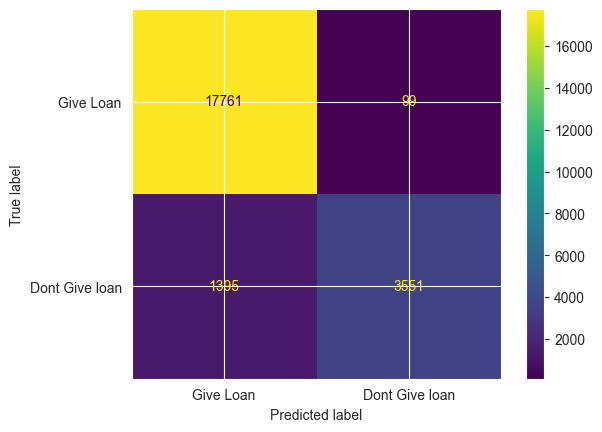

In [27]:
y_pred_train=clf.predict(x_train)
perform_Train(y_pred_train)

Testing Accuracy


Precision :  0.958148383005707

Recall :  0.6988899167437558

Accuracy Score :  0.9266496163682865

F1 Score :  0.8082374966568602

 [[7547   66]
 [ 651 1511]]



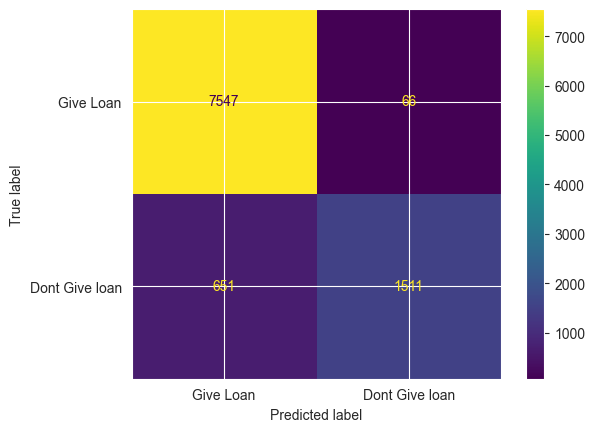

In [28]:
y_pred_test=clf.predict(x_test)
perform_Test(y_pred_test)

Decision Tree Plot

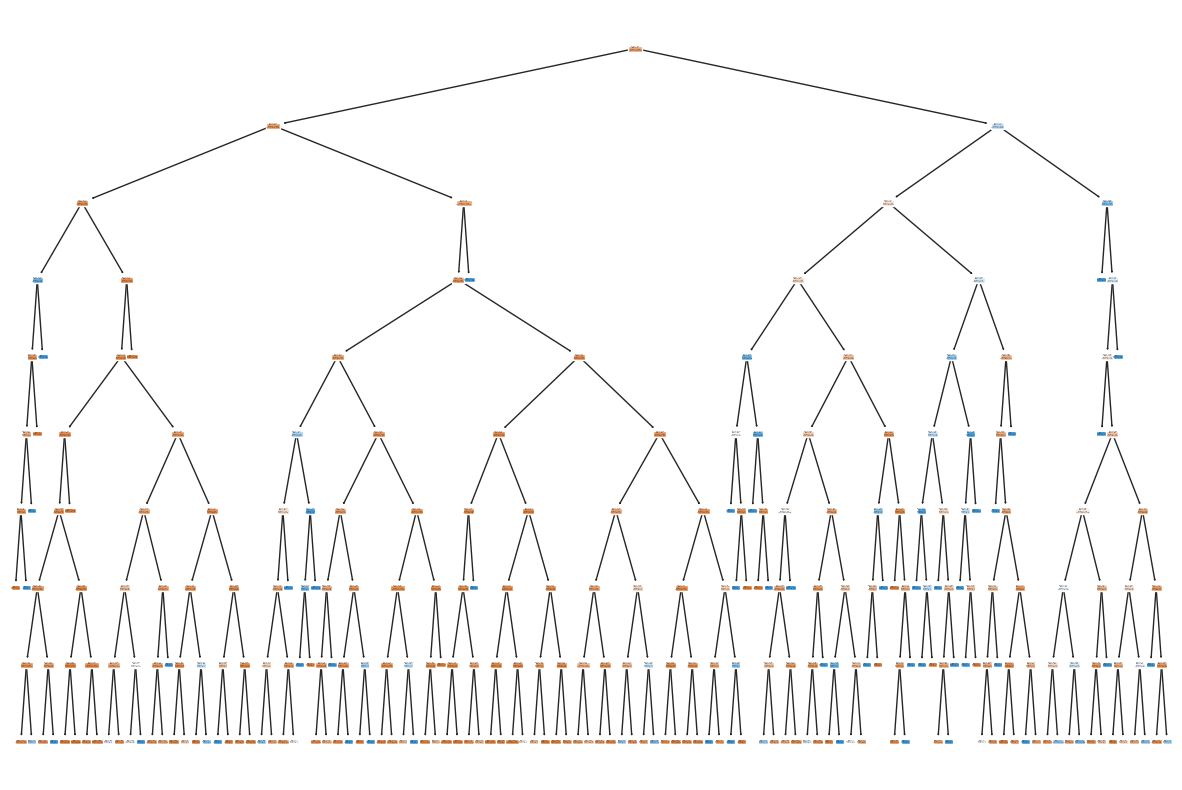

In [29]:
plt.figure(figsize=(15, 10))
plot_tree(clf, filled = True, rounded = False)
plt.show()

Classification report

In [30]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7613
           1       0.96      0.70      0.81      2162

    accuracy                           0.93      9775
   macro avg       0.94      0.85      0.88      9775
weighted avg       0.93      0.93      0.92      9775



Train SVM classifier 

In [64]:
svm_c=SVC(C=100, kernel='rbf', degree=3)
svm_c.fit(x_train,y_train)

SVC(C=100)

Training accuracy


Precision :  0.9515503875968992

Recall :  0.6949049737161342

Accuracy Score :  0.9261597825133737

F1 Score :  0.8032250525823791

 [[17685   175]
 [ 1509  3437]]



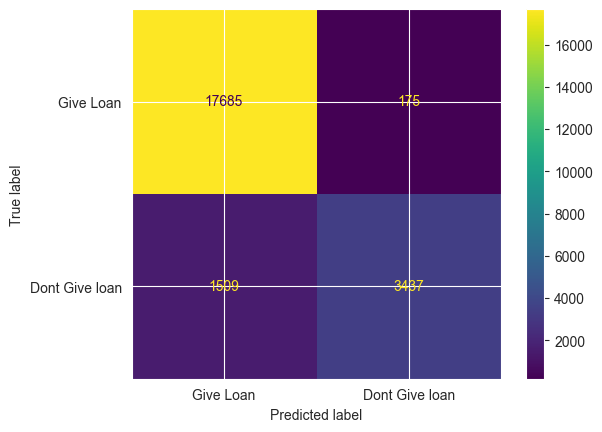

In [65]:
y_pred_train=svm_c.predict(x_train)
perform_Train(y_pred_train)

Testing Accuracy


Precision :  0.8938053097345132

Recall :  0.6540240518038853

Accuracy Score :  0.9062915601023018

F1 Score :  0.7553418803418803

 [[7445  168]
 [ 748 1414]]



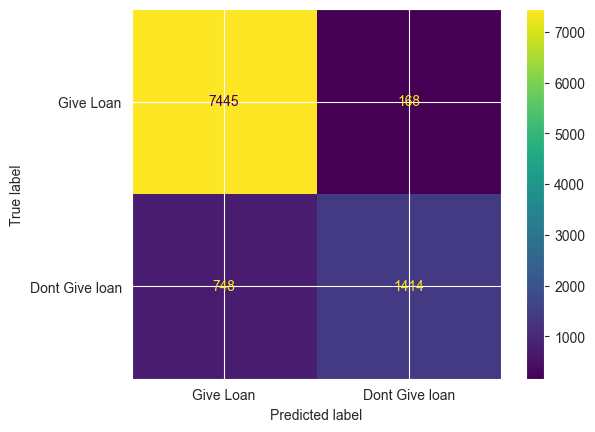

In [66]:
y_pred_test=svm_c.predict(x_test)
perform_Test(y_pred_test)

Classification report

In [67]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7613
           1       0.89      0.65      0.76      2162

    accuracy                           0.91      9775
   macro avg       0.90      0.82      0.85      9775
weighted avg       0.91      0.91      0.90      9775



Models Accuracy Comparison

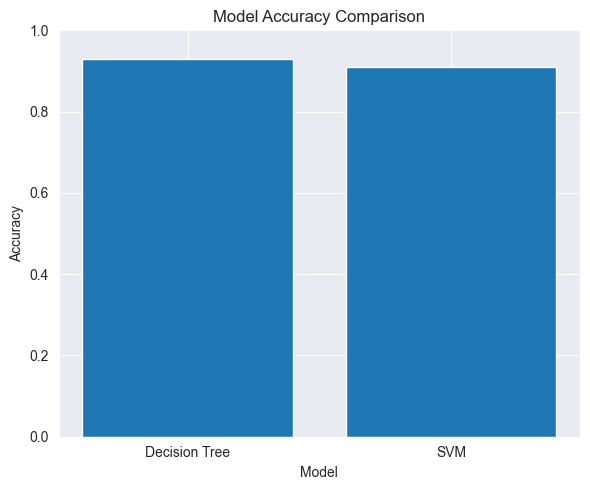

In [70]:
accuracies = {
    'Decision Tree': 0.93,
    'SVM': 0.91,
}
plt.figure(figsize=(6, 5))
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

Models Performance Comparison

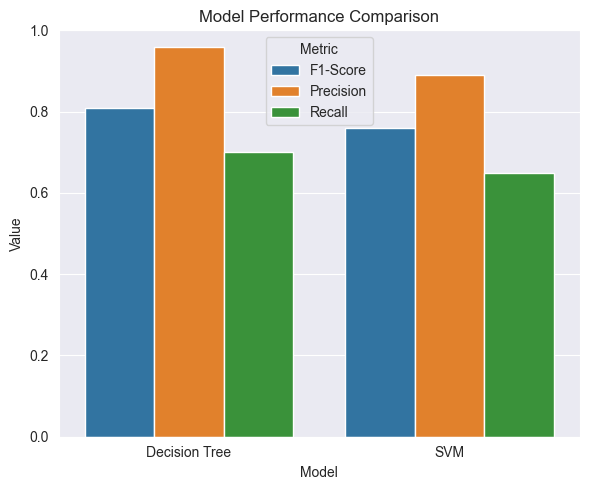

In [71]:
data = {
    'Model': [
              'Decision Tree', 'Decision Tree', 'Decision Tree',
              'SVM', 'SVM', 'SVM'
              ],
    'Metric': [
               'F1-Score', 'Precision', 'Recall',
               'F1-Score', 'Precision', 'Recall'
               ],
    'Value': [
               0.81, 0.96, 0.70,  # Values for Decision Tree
              0.76, 0.89, 0.65,  # Values for SVM
             ]  
}
df = pd.DataFrame(data)
plt.figure(figsize=(6, 5))
sns.barplot(x='Model', y='Value', hue='Metric', data=df)
plt.title('Model Performance Comparison')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()